In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_cleaned_data.csv')

In [3]:
dataset = pd.get_dummies(df, columns=["Type"])
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset = dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])
dataset

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Size,Type_1,Type_2,Type_3,Month
0,1,0,1,24924.50,42.31,0.00,0.00,0.0,0.00,151315,0,0,1,2
1,1,1,1,46039.49,38.51,0.00,0.00,0.0,0.00,151315,0,0,1,2
2,1,0,1,41595.55,39.93,0.00,0.00,0.0,0.00,151315,0,0,1,2
3,1,0,1,19403.54,46.63,0.00,0.00,0.0,0.00,151315,0,0,1,2
4,1,0,1,21827.90,46.50,0.00,0.00,0.0,0.00,151315,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420140,43,0,99,50.00,57.75,32.13,3.37,0.0,1004.04,41062,1,0,0,11
420141,43,0,99,25.00,47.59,32.95,1699.03,0.0,1168.66,41062,1,0,0,1
420142,43,0,99,5.00,87.75,402.48,0.00,0.0,1315.66,41062,1,0,0,6
420143,44,0,99,0.01,40.65,0.00,0.00,0.0,0.00,39910,1,0,0,3


In [4]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
    return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()  

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m

def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

In [14]:
odataset = dataset
train_split = int(dataset.shape[0] * 0.975)
train = dataset.iloc[:train_split]
test = dataset.iloc[train_split:]

In [15]:
dataset = train
kf = KFold(n_splits=5)
splited = []
# dataset2 = dataset.copy()


for name, group in dataset.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)

In [16]:
splited

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Size,Type_1,Type_2,Type_3,Month,fold
0,1,0,1,24924.50,42.31,0.00,0.00,0.00,0.00,151315,0,0,1,2,0.0
1,1,1,1,46039.49,38.51,0.00,0.00,0.00,0.00,151315,0,0,1,2,0.0
2,1,0,1,41595.55,39.93,0.00,0.00,0.00,0.00,151315,0,0,1,2,0.0
3,1,0,1,19403.54,46.63,0.00,0.00,0.00,0.00,151315,0,0,1,2,0.0
4,1,0,1,21827.90,46.50,0.00,0.00,0.00,0.00,151315,0,0,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368381,45,0,87,8787.85,64.88,4556.61,20.64,1601.01,3288.25,118221,0,1,0,9,4.0
368382,45,0,87,8289.04,64.89,5046.74,0.00,2253.43,2340.01,118221,0,1,0,10,4.0
368383,45,0,87,7918.21,54.47,1956.28,0.00,599.32,3990.54,118221,0,1,0,10,4.0
368384,45,0,87,7440.25,56.47,2004.02,0.00,437.73,1537.49,118221,0,1,0,10,4.0


In [17]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = splited.loc[splited['fold'] != fold]
    dataset_test = splited.loc[splited['fold'] == fold]
    train_y = dataset_train['Weekly_Sales']
    train_x = dataset_train.drop(columns=['Weekly_Sales', 'fold'])
    test_y = dataset_test['Weekly_Sales']
    test_x = dataset_test.drop(columns=['Weekly_Sales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model
error_cv /= 5

(293562, 15) (74824, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished


0 1848.4384084794337
Find best model
(293681, 15) (74705, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


1 3745.867761806313
(293843, 15) (74543, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished


2 1360.036803569918
Find best model
(296180, 15) (72206, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished


3 2271.198826886443
(296278, 15) (72108, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


4 1527.7059595413898


In [18]:
error_cv

2150.6495520566996

In [19]:
best_error

1360.036803569918

In [20]:
dataset_test = test.drop(columns=["Weekly_Sales"])
predicted_test = best_model.predict(dataset_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


<AxesSubplot:>

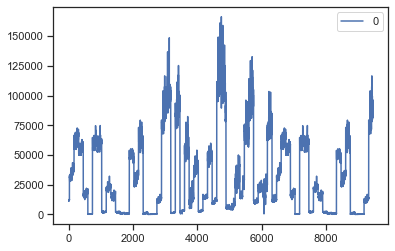

In [21]:
pd.DataFrame(predicted_test).plot()

<AxesSubplot:>

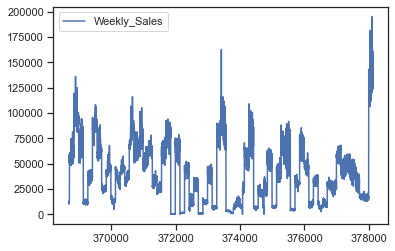

In [22]:
pd.DataFrame(test["Weekly_Sales"]).plot()